In [1]:
#pip install nltk

In [38]:
#pip install wordcloud

You should consider upgrading via the 'c:\miniconda\python.exe -m pip install --upgrade pip' command.


In [13]:
import nltk

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\dell
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\dell
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [28]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dell pc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [30]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\dell
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [3]:
from nltk.corpus import stopwords

In [4]:
from nltk.tokenize import word_tokenize

In [5]:
import pandas as pd

In [6]:
JD1 = pd.read_excel('E:\DS_JD.xlsx')

In [15]:
JD1

,JD
0,Someone who has traversed the Analytics &AI va...
1,Deep expertise in applying Analytics for two o...
2,In depth understanding of AI tools across Mach...
3,"Worked in a third party consulting, service, t..."
4,Consulted clients on aspiration to make them i...
...,...
1401,Develops and presents organized and clearl...
1402,"Conducts time series data analysis, segmen..."
1403,"Builds business intelligence reporting, ad..."
1404,Applies industry best practices in researc...


In [42]:
str(JD1['JD'])

'0       Someone who has traversed the Analytics &AI va...\n1       Deep expertise in applying Analytics for two o...\n2       In depth understanding of AI tools across Mach...\n3       Worked in a third party consulting, service, t...\n4       Consulted clients on aspiration to make them i...\n                              ...                        \n1401        Develops and presents organized and clearl...\n1402        Conducts time series data analysis, segmen...\n1403        Builds business intelligence reporting, ad...\n1404        Applies industry best practices in researc...\n1405        Supports training within and across teams ...\nName: JD, Length: 1406, dtype: object'

In [31]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove punctuation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
JD1["JD_clean"] = JD1["JD"].apply(lambda x: clean_text(x))

In [34]:
JD1

,JD,JD_clean,n_chars,n_words
0,Someone who has traversed the Analytics &AI va...,someone traverse analytics ai value chain move...,104,17
1,Deep expertise in applying Analytics for two o...,deep expertise apply analytics two industry bf...,126,16
2,In depth understanding of AI tools across Mach...,depth understand ai tool across machine learn ...,162,23
3,"Worked in a third party consulting, service, t...",worked third party consult service technology ...,100,16
4,Consulted clients on aspiration to make them i...,consult client aspiration make information lea...,86,12
...,...,...,...,...
1401,Develops and presents organized and clearl...,develops present organize clearly articulated ...,99,15
1402,"Conducts time series data analysis, segmen...",conduct time series data analysis segmentation...,216,30
1403,"Builds business intelligence reporting, ad...",build business intelligence report ad-hoc solu...,107,18
1404,Applies industry best practices in researc...,applies industry best practice research cut ed...,162,27


In [33]:
# add number of characters column
JD1["n_chars"] = JD1["JD"].apply(lambda x: len(x))

# add number of words column
JD1["n_words"] = JD1["JD"].apply(lambda x: len(x.split(" ")))

In [36]:
max(JD1['n_chars'])

1495

In [45]:
all_words = ''
for i in JD1['JD_clean']:
    tokens = i.split()
    all_words += " ".join(tokens)+" "

In [48]:
len(all_words)

122537

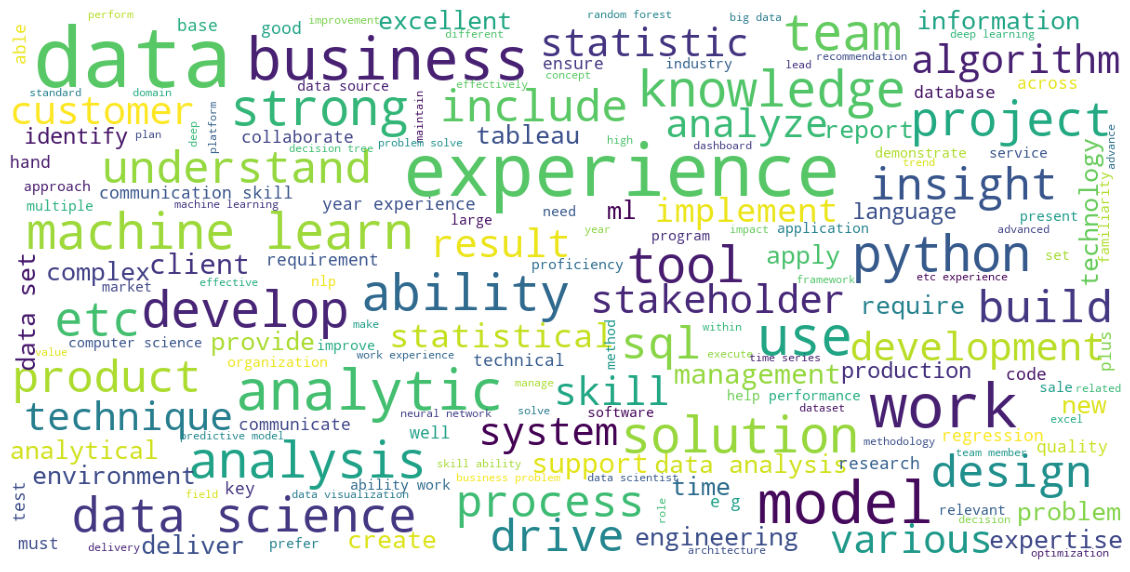

In [46]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 30, 
        scale = 3,
        random_state = 42
    ).generate(data)

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
#show_wordcloud(JD1["JD_clean"])
show_wordcloud(all_words)

In [50]:
from nltk.util import ngrams
from collections import Counter

In [73]:
type(Counter(ngrams(all_words.split(),5)))

collections.Counter

In [77]:
Counter(ngrams(all_words.split(),n_gram)).most_common(50)

[(('machine', 'learn', 'technique'), 15),
 (('large', 'data', 'set'), 12),
 (('machine', 'learn', 'algorithms'), 11),
 (('write', 'communication', 'skill'), 9),
 (('year', 'experience', 'data'), 9),
 (('problem', 'solve', 'skill'), 8),
 (('statistical', 'machine', 'learn'), 7),
 (('verbal', 'write', 'communication'), 7),
 (('experience', 'data', 'science'), 7),
 (('cluster', 'decision', 'tree'), 7),
 (('write', 'verbal', 'communication'), 7),
 (('data', 'mining', 'technique'), 7),
 (('strong', 'analytical', 'skill'), 6),
 (('machine', 'learn', 'deep'), 6),
 (('learn', 'deep', 'learning'), 6),
 (('write', 'oral', 'communication'), 6),
 (('communication', 'skill', 'ability'), 6),
 (('machine', 'learn', 'statistic'), 6),
 (('excellent', 'write', 'verbal'), 6),
 (('verbal', 'communication', 'skill'), 6),
 (('neural', 'network', 'etc'), 6),
 (('time', 'series', 'forecast'), 6),
 (('analytics', 'ai', 'lead'), 6),
 (('analytics', 'ai', 'value'), 5),
 (('ai', 'value', 'chain'), 5),
 (('minimum

In [64]:
Counter(ngrams(all_words.split(),2)).most_common(100)

[(('machine', 'learn'), 78),
 (('data', 'science'), 68),
 (('data', 'analysis'), 34),
 (('data', 'set'), 33),
 (('experience', 'data'), 31),
 (('year', 'experience'), 30),
 (('communication', 'skill'), 28),
 (('ability', 'work'), 24),
 (('data', 'source'), 24),
 (('computer', 'science'), 23),
 (('skill', 'ability'), 22),
 (('work', 'experience'), 21),
 (('data', 'scientist'), 21),
 (('business', 'problem'), 20),
 (('neural', 'network'), 20),
 (('etc', 'experience'), 20),
 (('data', 'analytics'), 19),
 (('machine', 'learning'), 19),
 (('predictive', 'model'), 18),
 (('problem', 'solve'), 18),
 (('deep', 'learning'), 18),
 (('team', 'member'), 17),
 (('experience', 'work'), 17),
 (('random', 'forest'), 16),
 (('data', 'visualization'), 16),
 (('decision', 'tree'), 15),
 (('big', 'data'), 15),
 (('statistical', 'analysis'), 15),
 (('large', 'data'), 15),
 (('work', 'closely'), 15),
 (('time', 'series'), 15),
 (('data', 'mining'), 15),
 (('learn', 'technique'), 15),
 (('analytics', 'ai'), 

In [62]:
Counter(ngrams(all_words.split(),1)).most_common(200)

[(('data',), 572),
 (('experience',), 299),
 (('business',), 205),
 (('work',), 205),
 (('model',), 165),
 (('skill',), 144),
 (('ability',), 142),
 (('analysis',), 140),
 (('team',), 128),
 (('use',), 125),
 (('analytics',), 120),
 (('learn',), 118),
 (('machine',), 102),
 (('strong',), 98),
 (('statistical',), 97),
 (('science',), 97),
 (('etc',), 94),
 (('tool',), 91),
 (('problem',), 90),
 (('knowledge',), 90),
 (('technique',), 89),
 (('solution',), 88),
 (('develop',), 83),
 (('product',), 83),
 (('insight',), 74),
 (('sql',), 73),
 (('project',), 72),
 (('python',), 71),
 (('development',), 67),
 (('process',), 66),
 (('new',), 65),
 (('build',), 64),
 (('analytical',), 64),
 (('understand',), 63),
 (('design',), 61),
 (('excellent',), 60),
 (('year',), 59),
 (('statistic',), 56),
 (('drive',), 55),
 (('include',), 55),
 (('set',), 55),
 (('decision',), 52),
 (('large',), 52),
 (('solve',), 52),
 (('customer',), 49),
 (('management',), 48),
 (('write',), 46),
 (('stakeholder',),